In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
pd.options.display.float_format = '{:.2f}'.format

In [47]:
df_tender_2018 = pd.read_csv("../data/releases_2018/tender_2018.csv")
df_tender_2019 = pd.read_csv("../data/releases_2019/tender_2019.csv")
df_tender_2020 = pd.read_csv("../data/releases_2020/tender_2020.csv")
df_tender_2021 = pd.read_csv("../data/releases_2021/tender_2021.csv")
df_tender = pd.concat([df_tender_2018, df_tender_2019, df_tender_2020, df_tender_2021], axis=0)

/home/citlalli/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (12,13,14,15,16,18,19,20,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
df_award_2018 = pd.read_csv("../data/releases_2018/awards_2018.csv")
df_award_2019 = pd.read_csv("../data/releases_2019/awards_2019.csv")
df_award_2020 = pd.read_csv("../data/releases_2020/awards_2020.csv")
df_award_2021 = pd.read_csv("../data/releases_2021/awards_2021.csv")
df_award = pd.concat([df_award_2018, df_award_2019, df_award_2020, df_award_2021], axis=0)

/home/citlalli/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (4,5,6,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/citlalli/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (4,6,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
df_contract_2018 = pd.read_csv("../data/releases_2018/contracts_2018.csv")
df_contract_2019 = pd.read_csv("../data/releases_2019/contracts_2019.csv")
df_contract_2020 = pd.read_csv("../data/releases_2020/contracts_2020.csv")
df_contract_2021 = pd.read_csv("../data/releases_2021/contracts_2021.csv")
df_contract = pd.concat([df_contract_2018, df_contract_2019, df_contract_2020, df_contract_2021], axis=0)

/home/citlalli/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (7,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [50]:
df_supplier_2018 = pd.read_csv("../data/releases_2018/suppliers_2018.csv")
df_supplier_2019 = pd.read_csv("../data/releases_2019/suppliers_2019.csv")
df_supplier_2020 = pd.read_csv("../data/releases_2020/suppliers_2020.csv")
df_supplier_2021 = pd.read_csv("../data/releases_2021/suppliers_2021.csv")
df_supplier = pd.concat([df_supplier_2018, df_supplier_2019, df_supplier_2020, df_supplier_2021], axis=0)

In [51]:
feature1_tender = df_tender[["ocid", "procuringEntity_name", "value_amount", "procurementMethod"]]
feature1_award = df_award[["ocid", "id", "amount", "status"]]
feature1_contract = df_contract[["ocid", "id", "amount"]]
feature1_supplier = df_supplier[["award_id", "name"]]

In [52]:
main_df = feature1_award.merge(feature1_contract, left_on="ocid", right_on="ocid", how="left", suffixes=("_aw", "_ctr"))
main_df = main_df.merge(feature1_tender, left_on="ocid", right_on="ocid", how="left")
main_df = main_df.merge(feature1_supplier, left_on="id_aw", right_on="award_id", how="left")

In [53]:
main_df.columns

Index(['ocid', 'id_aw', 'amount_aw', 'status', 'id_ctr', 'amount_ctr',
       'procuringEntity_name', 'value_amount', 'procurementMethod', 'award_id',
       'name'],
      dtype='object')

In [54]:
main_df.shape

(1553858, 11)

In [55]:
filtro1 = ~(main_df["amount_ctr"].isnull()) & ~(main_df["amount_aw"].isnull())
main_df = main_df[filtro1]

In [56]:
main_df.shape

(711254, 11)

In [57]:
main_df["diferencia_absoluta"] = np.abs(main_df["amount_aw"] - main_df["amount_ctr"])
main_df["diferencia_relativa"] = np.abs(main_df["diferencia_absoluta"] / main_df["amount_aw"])
main_df.head()

,ocid,id_aw,amount_aw,status,id_ctr,amount_ctr,procuringEntity_name,value_amount,procurementMethod,award_id,name,diferencia_absoluta,diferencia_relativa
1,ocds-5wno2w-SIE-008-HMHP-2018-11080,1236409-SIE-008-HMHP-2018,27699.00,NaN,526405-SIE-008-HMHP-2018,27699.00,HOSPITAL MATILDE HIDALGO DE PROCEL,nan,open,1236409-SIE-008-HMHP-2018,SALAZAR SALAZAR LUIS ALBERTO,0.00,0.00
2,ocds-5wno2w-SIE-CONAFIPS-03-2018-448191,1374768-SIE-CONAFIPS-03-2018,10300.93,NaN,578390-SIE-CONAFIPS-03-2018,10300.93,CORPORACIÓN NACIONAL DE FINANZAS POPULARES Y S...,nan,open,1374768-SIE-CONAFIPS-03-2018,ITSEGUINFO CIA. LTDA.,0.00,0.00
3,ocds-5wno2w-SIE-EPP-2016233-018-253178,1375948-SIE-EPP-2016233-018,192000.00,NaN,589838-SIE-EPP-2016233-018,192000.00,Empresa Pública de hidrocarburos del Ecuador E...,nan,open,1375948-SIE-EPP-2016233-018,IASA S.A.,0.00,0.00
4,ocds-5wno2w-SIE-EPP-674Y678-1-18-253178,1390713-SIE-EPP-674Y678-1-18,65800.00,NaN,611465-SIE-EPP-674Y678-1-18,65800.00,Empresa Pública de hidrocarburos del Ecuador E...,nan,open,1390713-SIE-EPP-674Y678-1-18,VELASTEGUI LASSO BOLIVAR ALEJANDRO,0.00,0.00
14,ocds-5wno2w-RE-HEJCA-F-66-2018-87497,3416132-RE-HEJCA-F-66-2018,14810.82,NaN,565301-RE-HEJCA-F-66-2018,14810.82,HOSPITAL DE ESPECIALIDADES JOSÉ CARRASCO ARTEAGA,14810.82,direct,3416132-RE-HEJCA-F-66-2018,QUIFATEX S.A.,0.00,0.00


In [58]:
#Empresa, diferenciaRelativaPromedio, numeroProcesos, porcentajeAdjudicacion, cantidadEmpresaDiferentes

In [59]:
percentaje = main_df.groupby(["procuringEntity_name", "name"])["id_aw"].count().reset_index()

In [60]:
main_df["id_aw"].isnull().sum()

0

In [61]:
main_df["name"].isnull().sum()

5

In [62]:
main_df["procuringEntity_name"].isnull().sum()

0

In [64]:
main_df["name"]

1                SALAZAR SALAZAR LUIS ALBERTO
2                       ITSEGUINFO CIA. LTDA.
3                                   IASA S.A.
4          VELASTEGUI LASSO BOLIVAR ALEJANDRO
14                              QUIFATEX S.A.
                          ...                
1470010            VISION DINAMICA S A VISIDI
1470011            VISION DINAMICA S A VISIDI
1470012                        COAGVELCOR S.A
1470013          QUIROZ ROSADO ROCIO MARICELA
1470014     VALENZUELA OLALLA FANNY JACKELINE
Name: name, Length: 711254, dtype: object

In [16]:
main_df = main_df.groupby("procuringEntity_name").agg({
    "diferencia_relativa" : "mean",
    "diferencia_absoluta" : "mean",
}).reset_index()

In [17]:

main_df["total_procesos"] = percentaje.groupby(["procuringEntity_name"])["id_aw"].sum().reset_index()["id_aw"]
main_df["unicos"] = percentaje.groupby(["procuringEntity_name"])["id_aw"].count().reset_index()["id_aw"]
main_df["porcentaje_unicos"] = main_df["unicos"] / main_df["total_procesos"]

In [18]:
main_df.head()

,procuringEntity_name,diferencia_relativa,diferencia_absoluta,total_procesos,unicos,porcentaje_unicos
0,\t GOBIERNO AUTONOMO PARROQUIAL DE SINAI,0.00,0.00,1,1,1.00
1,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PARRO...,0.00,0.00,6,6,1.00
2,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,1,1,1.00
3,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,3,3,1.00
4,JUNTA PARROQUIAL DE SANTA RITA,0.00,0.00,1,1,1.00


In [19]:
main_df.columns = ["Licitante", "Diferencia relativa Promedio", "Diferencia absoluta promedio", "Total Procesos", "Empresas Unicas", "Porcentaje Empresas Unicas"]
main_df.head()

,Licitante,Diferencia relativa Promedio,Diferencia absoluta promedio,Total Procesos,Empresas Unicas,Porcentaje Empresas Unicas
0,\t GOBIERNO AUTONOMO PARROQUIAL DE SINAI,0.00,0.00,1,1,1.00
1,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PARRO...,0.00,0.00,6,6,1.00
2,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,1,1,1.00
3,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,3,3,1.00
4,JUNTA PARROQUIAL DE SANTA RITA,0.00,0.00,1,1,1.00


In [22]:
X = main_df.iloc[:,1:]
X.head()

,Diferencia relativa Promedio,Diferencia absoluta promedio,Total Procesos,Empresas Unicas,Porcentaje Empresas Unicas
0,0.00,0.00,1,1,1.00
1,0.00,0.00,6,6,1.00
2,0.00,0.00,1,1,1.00
3,0.00,0.00,3,3,1.00
4,0.00,0.00,1,1,1.00


In [23]:
sc = StandardScaler()

In [24]:
sc.fit(X)

StandardScaler()

In [25]:
X_norm = sc.transform(X)

In [26]:
X_norm

array([[-0.01885922, -0.01910406, -0.03819581, -0.4640265 ,  1.00844634],
       [-0.01885922, -0.01910406, -0.03742612, -0.36440881,  1.00844634],
       [-0.01885922, -0.01910406, -0.03819581, -0.4640265 ,  1.00844634],
       ...,
       [-0.01885922, -0.01910406, -0.03819581, -0.4640265 ,  1.00844634],
       [-0.01881758, -0.01910377, -0.00663844, -0.28471467, -2.96932201],
       [-0.01885922, -0.01910406, -0.03804187, -0.44410296,  1.00844634]])

In [27]:
X_norm.shape

(2855, 5)

In [28]:
clusters = np.arange(2,10)

In [29]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [30]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

In [31]:
eva

,K,inercia
0,2,8564.13
1,3,5860.38
2,4,3548.38
3,5,2207.16
4,6,1638.14
5,7,1121.07
6,8,935.57
7,9,775.01


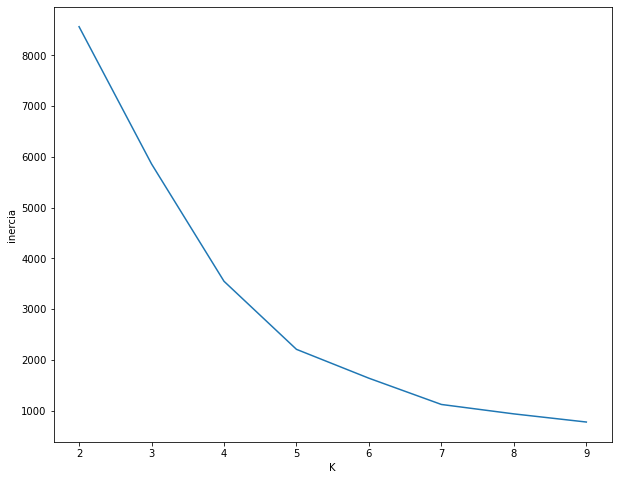

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [33]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [34]:
kmeans.fit(X_norm)

KMeans(n_clusters=5, random_state=0)

In [35]:
kmeans.cluster_centers_

array([[-1.87517836e-02, -1.90625722e-02, -7.81614066e-03,
         5.64737391e-02, -8.55066218e-01],
       [ 5.34225555e+01,  5.34170965e+01, -1.92613872e-02,
         8.90773997e-01, -8.45903373e-01],
       [-1.87347039e-02, -1.91021243e-02,  5.17525315e+01,
         3.79961035e+00, -3.16959771e+00],
       [-1.86994400e-02, -1.84607777e-02, -3.70153217e-02,
        -3.34301289e-01,  7.34769227e-01],
       [-1.86533816e-02, -1.87319737e-02,  1.17219693e-01,
         3.47110013e+00, -1.24386310e+00]])

In [36]:
main_df["cluster"] = kmeans.labels_

In [37]:
main_df.head()

,Licitante,Diferencia relativa Promedio,Diferencia absoluta promedio,Total Procesos,Empresas Unicas,Porcentaje Empresas Unicas,cluster
0,\t GOBIERNO AUTONOMO PARROQUIAL DE SINAI,0.00,0.00,1,1,1.00,3
1,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PARRO...,0.00,0.00,6,6,1.00,3
2,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,1,1,1.00,3
3,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL ...,0.00,0.00,3,3,1.00,3
4,JUNTA PARROQUIAL DE SANTA RITA,0.00,0.00,1,1,1.00,3


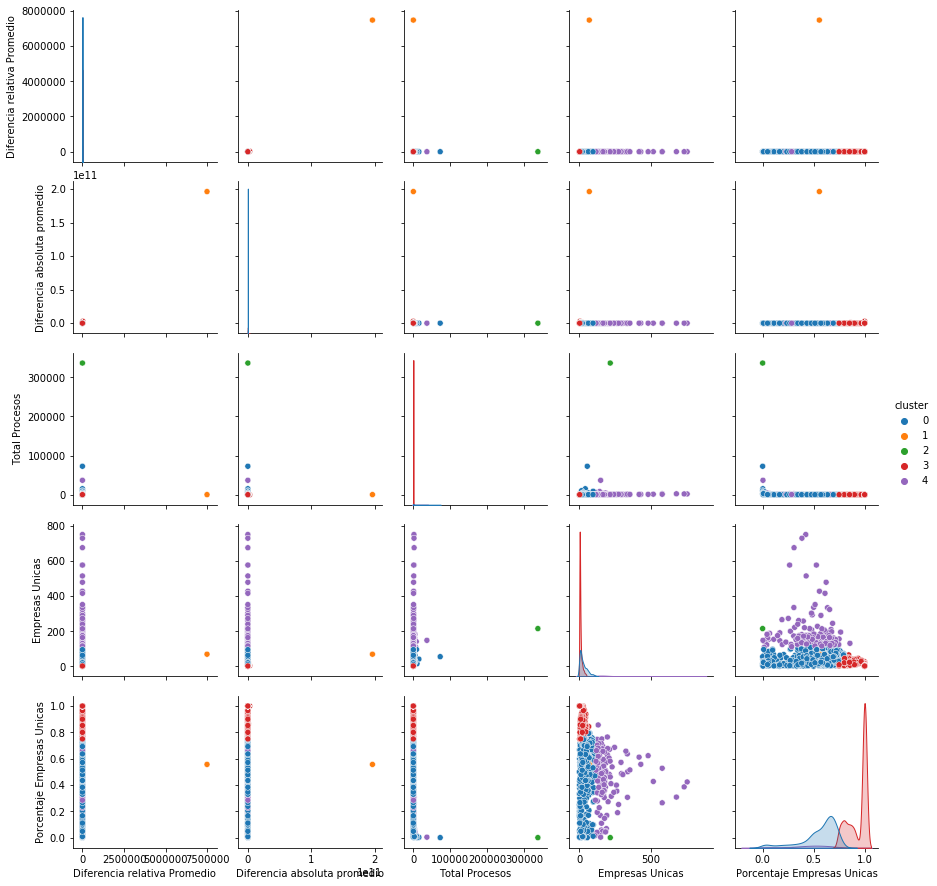

In [38]:
sns.pairplot(main_df,hue="cluster", palette="tab10")

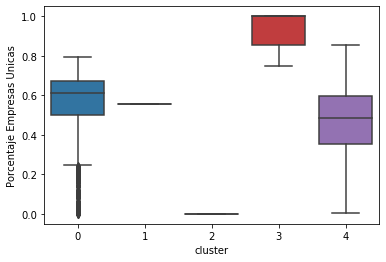

In [39]:
sns.boxplot(x="cluster", y="Porcentaje Empresas Unicas", data=main_df)

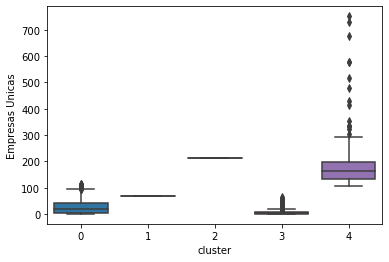

In [40]:
sns.boxplot(x="cluster", y="Empresas Unicas", data=main_df)

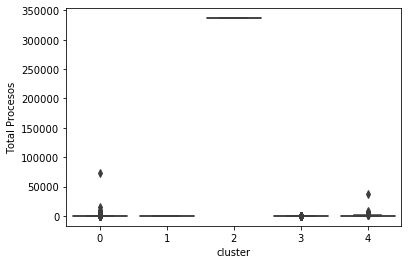

In [41]:
sns.boxplot(x="cluster", y="Total Procesos", data=main_df)

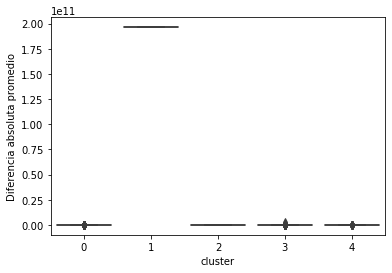

In [42]:
sns.boxplot(x="cluster", y="Diferencia absoluta promedio", data=main_df)

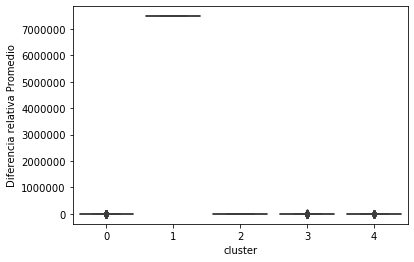

In [43]:
sns.boxplot(x="cluster", y="Diferencia relativa Promedio", data=main_df)

In [44]:
main_df.corr()

,Diferencia relativa Promedio,Diferencia absoluta promedio,Total Procesos,Empresas Unicas,Porcentaje Empresas Unicas,cluster
Diferencia relativa Promedio,1.00,1.00,-0.00,0.02,-0.02,-0.01
Diferencia absoluta promedio,1.00,1.00,-0.00,0.02,-0.02,-0.01
Total Procesos,-0.00,-0.00,1.00,0.10,-0.11,-0.00
Empresas Unicas,0.02,0.02,0.10,1.00,-0.37,0.06
Porcentaje Empresas Unicas,-0.02,-0.02,-0.11,-0.37,1.00,0.64
cluster,-0.01,-0.01,-0.00,0.06,0.64,1.00
